<a href="https://colab.research.google.com/github/VaibhavNagrale007/Adversarial-Machine-Learning-BTP/blob/main/Sem%208/Pneumonia_CNN_RedAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)

In [ ]:
import numpy as np # linear algebra
import cv2 # import cv2
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Dataset/xray_pneumonia.zip

In [ ]:
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# from keras.utils import np_utils

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet101, Xception
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, InputLayer

from tensorflow.keras.models import Model, load_model

In [ ]:
# LR = 0.0001
EPOCHS = 500
BATCH_SIZE = 16
IMG_SIZE = 224

In [ ]:
train_folder = '/content/xray_pneumonia/train'
test_folder ='/content/xray_pneumonia/test'
val_folder ='/content/xray_pneumonia/val'

In [ ]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 224 # resize image

def get_data_train(data_dir):
    data = []

    for label in labels:
        count = 0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                count = count + 1
                if(count > 480):
                  break

                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])

            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [ ]:
def get_data_test(data_dir):
    data = []

    for label in labels:
        count = 0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                count = count + 1
                if(count > 120):
                  break

                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [ ]:

import os
train = get_data_train(train_folder)
test = get_data_test(test_folder)
val = get_data_train(val_folder)

In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [ ]:
print(X_train[1])

[[ 36  44  52 ... 146 134  65]
 [ 36  47  48 ... 156 113  62]
 [ 36  47  50 ... 146  91  61]
 ...
 [ 62  80  95 ...   0   0   0]
 [ 66  78  96 ...   0   0   0]
 [ 59  82 109 ...   0   0   0]]


In [ ]:
print(y_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:

from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 480, 1: 480})
Counter({0: 120, 1: 120})


In [ ]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test= np.array(y_test)
X_val = np.array(X_val)/255
y_val = np.array(y_val)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(960, 224, 224)
(960,)
(240, 224, 224)
(240,)
(16, 224, 224)
(16,)


In [ ]:
# from keras.utils import to_categorical

# y_train = to_categorical(y_train, num_classes=2)
# y_test = to_categorical(y_test, num_classes=2)
# y_val = to_categorical(y_val, num_classes=2)

In [ ]:
y_train = np.reshape(y_train, (len(y_train), 1))
y_test = np.reshape(y_test, (len(y_test), 1))
y_val = np.reshape(y_val, (len(y_val), 1))

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(960, 224, 224)
(960, 1)
(240, 224, 224)
(240, 1)
(16, 224, 224)
(16, 1)


In [ ]:
def expand_greyscale_image_channels(grey_image):
    grey_image_arr = np.array(grey_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [ ]:
print(X_train[1].shape)

(224, 224)


In [ ]:
print(X_train.shape)

(960, 224, 224)


In [ ]:
X_train1 = []
for i in range(len(X_train)):
  X_train1.append(expand_greyscale_image_channels(X_train[i]))

In [ ]:
print(np.array(X_train1[1]).shape)

(224, 224, 3)


In [ ]:
X_test1 = []
for i in range(len(X_test)):
  X_test1.append(expand_greyscale_image_channels(X_test[i]))

In [ ]:
X_train = np.array(X_train1)
X_test = np.array(X_test1)
print(X_train.shape)
print(X_test.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)


## Model Train

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    Flatten(),

    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Output layer with 1 unit for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from keras.callbacks import ModelCheckpoint

# ModelCheckpoint to save the best model during training
checkpoint_path = "/content/drive/MyDrive/Dataset/CNN_Model_sem8.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

import time
start = time.time()

# Training the model
history = model.fit(
                X_train, y_train,
                batch_size=BATCH_SIZE,
                steps_per_epoch=len(X_train)//BATCH_SIZE,
                validation_data=(X_test, y_test),
                validation_steps=len(X_test)//BATCH_SIZE,
                epochs=EPOCHS,
                callbacks = [checkpoint],
                verbose=1)

end = time.time()

print('Program processed ', end - start, 's, ', (end - start)/60, 'min, ', (end - start)/3600, 'h')

Epoch 1/500
59/60 [============================>.] - ETA: 0s - loss: 0.5901 - accuracy: 0.7150

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 11s 65ms/step - loss: 0.5910 - accuracy: 0.7135 - val_loss: 0.5981 - val_accuracy: 0.6667
Epoch 2/500
60/60 [==============================] - 4s 63ms/step - loss: 0.3666 - accuracy: 0.8615 - val_loss: 0.5732 - val_accuracy: 0.7500
Epoch 3/500
60/60 [==============================] - 2s 36ms/step - loss: 0.2451 - accuracy: 0.9062 - val_loss: 0.9060 - val_accuracy: 0.6708
Epoch 4/500
60/60 [==============================] - 3s 52ms/step - loss: 0.1748 - accuracy: 0.9417 - val_loss: 0.7465 - val_accuracy: 0.7750
Epoch 5/500
60/60 [==============================] - 2s 36ms/step - loss: 0.1227 - accuracy: 0.9635 - val_loss: 1.2462 - val_accuracy: 0.7167
Epoch 6/500
60/60 [==============================] - 2s 36ms/step - loss: 0.0866 - accuracy: 0.9771 - val_loss: 1.7026 - val_accuracy: 0.6667
Epoch 7/500
60/60 [==============================] - 2s 34ms/step - loss: 0.0557 - accuracy: 0.9792 - val_loss: 1.6550 - val_accuracy: 0.7000
Epoch 8/500
60/60

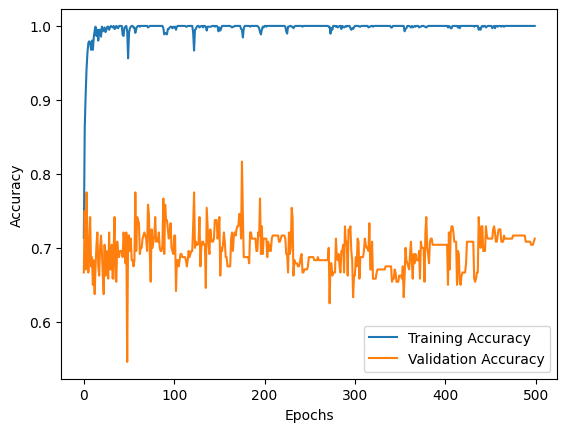

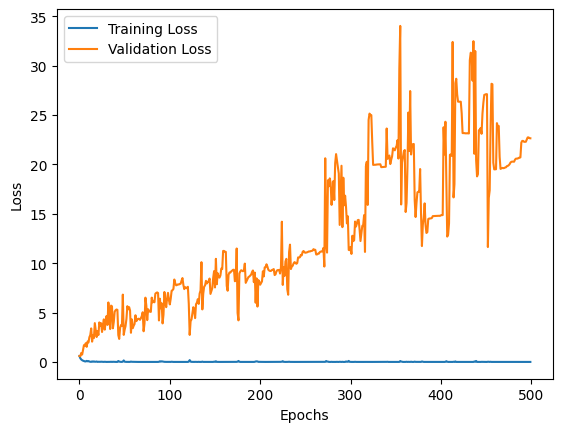

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig(plot_path)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig(plot_path)

In [ ]:
score = model.evaluate(X_train, y_train)
print("Model accuracy on Train dataset: %f." %(score[1]*100))

30/30 [==============================] - 1s 19ms/step - loss: 1.0265e-10 - accuracy: 1.0000
Model accuracy on Train dataset: 100.000000.


In [ ]:
score = model.evaluate(X_test, y_test)
print("Model accuracy on Test dataset: %f." %(score[1]*100))

8/8 [==============================] - 0s 21ms/step - loss: 22.6399 - accuracy: 0.7125
Model accuracy on Test dataset: 71.249998.


## Load Model

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("/content/drive/MyDrive/Dataset/CNN_Model_sem8.h5")

In [ ]:
score = model.evaluate(X_train, y_train)
print("Model accuracy on Train dataset: %f." %(score[1]*100))

30/30 [==============================] - 32s 1s/step - loss: 1.1407 - accuracy: 0.9271
Model accuracy on Train dataset: 92.708331.


In [ ]:
score = model.evaluate(X_test, y_test)
print("Model accuracy on Test dataset: %f." %(score[1]*100))

8/8 [==============================] - 7s 855ms/step - loss: 5.2377 - accuracy: 0.7667
Model accuracy on Test dataset: 76.666665.


# Implementation of the Red Attack

### Boundary Estimation

In [ ]:
import cv2
import numpy as np
from PIL import Image

height = IMG_SIZE
width = IMG_SIZE

def max_diff(img1, img2):
    return np.amax(img1-img2)

def pred(image):
    data = []
    data.append(image)
    X_test = np.array(data)
    X_test = X_test.astype('float32')/255
    X_test = X_test.reshape(1,height,width,3)
    predict_x=model.predict(X_test)
    pred_target_image = 1 if predict_x[0, 0] > 0.5 else 0
    return pred_target_image

def boundary_estimation(source,target, delta_min):
    print("Boundary Estimation")
    adv = (source+target)/2
    delta = max_diff(source, target)
    k = pred(adv)
    left = source
    right = target
    while delta > delta_min:
        print('stuck in while -> boundary_estimation')
        if pred(source) != k:
            right = adv
        else:
            left = adv
        adv = (left+right)/2.0
        k = pred(adv)
        delta = max_diff(left, right)
    return right

### Boundary Estimation Check

In [ ]:
source_image_path = "/content/drive/MyDrive/Dataset/xray_pneumonia/train/NORMAL/IM-0158-0001.jpeg";
target_image_path = "/content/drive/MyDrive/Dataset/xray_pneumonia/train/PNEUMONIA/person100_virus_184.jpeg";

1/1 [==============================] - 0s 55ms/step


[]

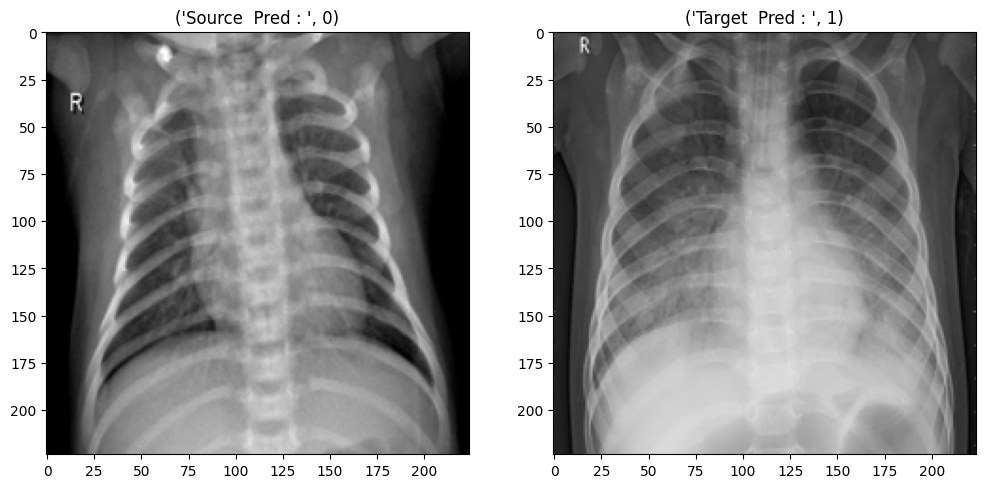

In [ ]:
# image preprocessing

img = (np.asarray(Image.open(source_image_path)))
img2_rgb = np.repeat(img[:, :, np.newaxis], 3, axis=2)
image_from_array = Image.fromarray(img2_rgb, 'RGB')
img1 = image_from_array.resize((height, width))
img1=np.array(img1)
img1=img1.reshape(height,width,3)
source_image = np.array(img1)

img = (np.asarray(Image.open(target_image_path)))
img2_rgb = np.repeat(img[:, :, np.newaxis], 3, axis=2)
image_from_array = Image.fromarray(img2_rgb, 'RGB')
img2 = image_from_array.resize((height, width))
img2=np.array(img2)
img2=img2.reshape(height,width,3)
target_image = np.array(img2)

# figure plotting

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 6)
ax1.imshow(source_image[:,:,0],cmap = "gray")
ax1.set_title(("Source  Pred : ",pred(source_image)))
ax2.imshow(target_image[:,:,0],cmap = "gray")
ax2.set_title(("Target  Pred : ",pred(target_image)))
plt.plot()

Boundary Estimation
1/1 [==============================] - 0s 57ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 53ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 51ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 66ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 85ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 89ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 104ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 83ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 85ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 102ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 85ms/step
stuck in while -> boundary

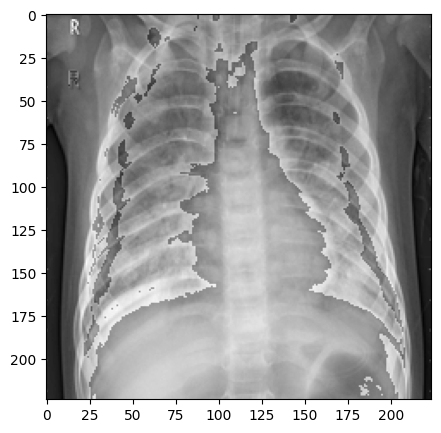

In [ ]:
neww = boundary_estimation(source_image,target_image,0.1)
plt.figure(figsize=(5,5))
plt.imshow(neww[:,:,0],cmap = 'gray')
plt.plot()
print("Predicted Value : ",(pred(neww)))

In [ ]:
# print (pred(i))
# print (pred(source_image)) #Class of source image
# print (pred(target_image)) #Class of target image

In [ ]:
# ii = go_out(source_image,i,0.01)

In [ ]:
# print(pred(ii))

### Gradient Estimation

In [ ]:
# def go_out(source,iout,alpha):
#     i_diff = iout - source
#     pred_source = pred(source)
#     inew = iout
#     # Note: added limit to end
#     # limit = 10
#     while (pred(inew)==pred_source):
#         inew = inew + alpha*(i_diff)
#         # limit = limit - 1
#         # if (limit < 0): break

#     return inew

# def array_diff(d1):
#     sumd1 = 0.0
#     for i in range(0,3):
#         for j in range(0,height):
#             for k in range(0,width):
#                 d1[j][k][i] = d1[j][k][i]*d1[j][k][i]
#                 sumd1 = sumd1 + d1[j][k][i]
#     return (sumd1)

# def gradient_estimation(source, target, adversarial, n, theta):
#     Ia = source
#     Ib = target
#     Ii = adversarial
#     Io = np.zeros((2700))
#     X = np.random.randint(0,2700, size=n)
#     for i in X:
#         Io[i] = 255
#     Io = Io.reshape((height,width,3))
#     Ii2 = Ii + theta*Io
#     Ii2_new = boundary_estimation(Ia, Ii2, 1.0)
#     Ii2_new = go_out(source,Ii2_new,0.01)
#     diff2 = Ii2_new - Ia
#     diff1 = Ii - Ia
#     d2 = array_diff(diff2)
#     d1 = array_diff(diff1)
#     if (d2 > d1):
#         return (-1, Ii2_new)
#     elif (d1 > d2):
#         return (1, Ii2_new)
#     else:
#         return (0,Ii2_new)

def go_out(source,iout,alpha):
    print("Go Out")
    i_diff = iout - source
    pred_source = pred(source)
    inew = iout
    speedbreaker = 1
    while (pred(inew)==pred_source):
        print('stuck in while -> go_out')
        inew = inew + alpha*(i_diff)
        # update in code to increase alpha to make code faster
        speedbreaker = speedbreaker + 1
        if speedbreaker > 100:
            print('[][][] Go out speed breaker [][][]')
            break

    return inew

def array_diff(A):
  return (A*A).sum()

def gradient_estimation(source, target,adv,n,theta):
    print("Gradient Estimation")
    Io = np.zeros((height*width*3))
    X = np.random.randint(0,height*width*3,size = n)
    for i in X:
        Io[i] = 255
    Io = Io.reshape((height,width,3))
    Ii2 = adv + theta*Io
    print(pred(source),pred(adv),pred(Ii2))
    Ii2 = go_out(source,Ii2,0.01)
    print(pred(source),pred(adv),pred(Ii2))
    Ii2_new = boundary_estimation(source,Ii2,1.0)
    #comment lower line for original
    Ii2_new = go_out(source,Ii2_new,0.01)
    print(pred(source),pred(adv),pred(Ii2))
    d2 = array_diff(Ii2_new - source)
    d1 = array_diff(adv - source)
    if d2 > d1:
      return (-1,Ii2_new)
    elif d1 > d2:
      return (1,Ii2_new)
    else:
      return (0,Ii2_new)

### Gradient Estimation Testing

Gradient Estimation
1/1 [==============================] - 0s 53ms/step
0 1 1
go out
1/1 [==============================] - 0s 51ms/step
0 1 1
Boundary Estimation
1/1 [==============================] - 0s 61ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 55ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 53ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 53ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 53ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 58ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 52ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 51ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 53ms/step
go out
1/1 [==============================] - 0s 54ms/step
0 1 1


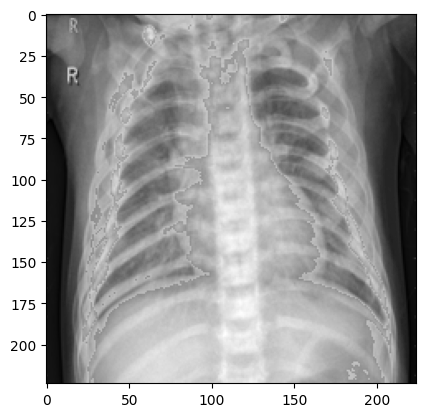

In [ ]:
(a,b) = gradient_estimation(source_image,target_image,neww,5,0.196)
print(a)
plt.imshow(b[:,:,0],cmap = "gray")

### Efficient Update

In [ ]:
# def efficient_update(source, target, adversarial, I2, g, j):
#     Ia = source
#     Ib = target
#     Ii = adversarial
#     Ii2 = I2
#     delta = g*(Ii2 - Ii)
#     l = j
#     Inew = Ii + l*delta

#     diff1 = Inew - Ia
#     diff2 = Ii - Ia
#     d1 = array_diff(diff1)
#     d2 = array_diff(diff2)
#     ii = 0
#     it = 0
#     while(d1 > d2):
#         l = (l/2.0)
#         Inew = Ii + l*delta
#         if(pred(Inew)==pred(source)):
#             Inew = go_out(source,Inew,0.01)
#         it = it + 1
#         d1 = array_diff(Inew-Ia)
#         if(it>100):
#             break
#     if (d1 > d2):
#         print(ii)
#         ii = ii + 1
#         Inew = Ii
#     return Inew

def efficient_update(source, target, adv, I2, g, j):
    print("Efficient Update")
    delta = g*(I2 - adv)
    jump = j
    Inew = adv + jump*delta
    print(pred(source),pred(adv),pred(Inew))
    Inew = go_out(source,Inew,0.01)
    d1 = array_diff(Inew - source)
    d2 = array_diff(adv - source)
    flag, it = 0,0
    while d1 > d2:
        print('stuck in while -> efficient_update')
        jump = (jump/2.0)
        Inew = adv + jump*delta
        if(pred(Inew)==pred(source)):
            print(pred(source),pred(adv),pred(Inew))
            Inew = go_out(source,Inew,0.01)
        it = it + 1
        d1 = array_diff(Inew-source)
        if it > 100:
            break
    if d1 > d2:
        flag = 1
        print("flag is : ",flag)
        Inew = adv
    return Inew

In [ ]:
# def iteration(itr, source, target, n, theta, j, dmin):
#     targett = target
#     sourcee = source
#     for i in range(itr):
#         print ("\n Iteration: ",i)
#         adversarial_image = boundary_estimation(sourcee, targett, dmin)
#         adversarial_image = go_out(sourcee,adversarial_image,0.01)
#         (g, Iii2) = gradient_estimation(sourcee, targett, targett, n, theta)
#         targett = efficient_update(sourcee, targett, adversarial_image, Iii2, g, j)
#         if (pred(targett) == pred(source)):
#             j = j/2.0
#         fin = targett
#         if(pred(targett)==pred(sourcee)):
#             fin = go_out(sourcee,targett,0.01)
#         if(array_diff(fin-sourcee)<array_diff(adversarial_image-sourcee)):
#             targett = fin

#     return fin

def iteration(itr, source, target, n, theta, j, dmin):
    targett = target
    sourcee = source
    for i in range(itr):
        print("Iteration",i)
        adversarial_image = boundary_estimation(sourcee, targett, dmin)
        adversarial_image = go_out(sourcee,adversarial_image,0.01)
        (g, Iii2) = gradient_estimation(sourcee, targett, targett, n, theta)
        targett = efficient_update(sourcee, targett, adversarial_image, Iii2, g, j)

        if (pred(targett) == pred(source)):
            j = j/2.0
        fin = targett
        print("array_diff(fin-sourcee)",array_diff(fin-sourcee))
        if(pred(targett)==pred(sourcee)):
            fin = go_out(sourcee,targett,0.01)
        if(array_diff(fin-sourcee)<array_diff(adversarial_image-sourcee)):
            targett = fin
            #print("uopp")

    return fin

In [ ]:
final = iteration(100,source_image,target_image,5,0.196,5.0,1.0)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 56ms/step
Gradient Estimation
1/1 [==============================] - 0s 62ms/step
0 1 1
Go Out
1/1 [==============================] - 0s 59ms/step
0 1 1
Boundary Estimation
1/1 [==============================] - 0s 63ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 52ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 56ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 62ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 55ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 66ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 53ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 56ms/step
stuck in while -> boundary_estimation
1/1 [=========

### Compare result

1/1 [==============================] - 0s 170ms/step
Original Image label :  0
1/1 [==============================] - 0s 105ms/step
Perturbed Image label :  1


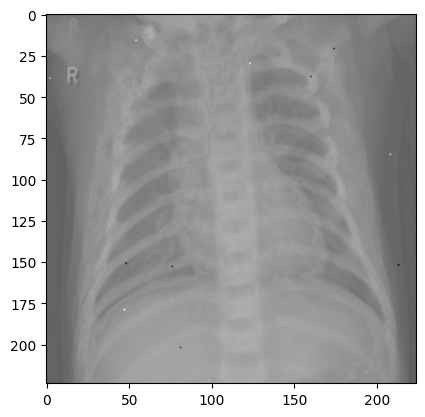

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray") # 100 iterations similarity = 0.7867876247734484
print("Original Image label : ", pred(source_image))
print("Perturbed Image label : ",pred(final))

1/1 [==============================] - 0s 111ms/step
Original Image label :  0
1/1 [==============================] - 0s 92ms/step
Perturbed Image label :  1


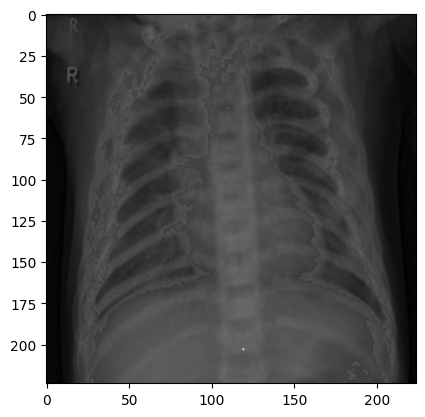

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray") # 10 iterations similarity = 0.7012411620052176
print("Original Image label : ", pred(source_image))
print("Perturbed Image label : ",pred(final))

1/1 [==============================] - 0s 76ms/step
Original Image label :  0
1/1 [==============================] - 0s 93ms/step
Perturbed Image label :  1


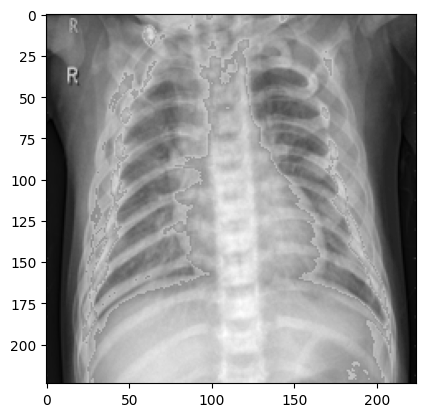

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray") # 2 iterations similarity = 0.6854118046168826
print("Original Image label : ", pred(source_image))
print("Perturbed Image label : ",pred(final))

In [ ]:
from skimage.metrics import structural_similarity
s = structural_similarity(source_image,final,channel_axis=2)
print(s)

0.7867876247734484


### Save Image

In [ ]:
Image.fromarray(source_image.astype('uint8')).save('/content/drive/MyDrive/Dataset/original_xray3.png')
Image.fromarray(final.astype('uint8')).save('/content/drive/MyDrive/Dataset/perturbed_xray3.png')
# s = measure.compare_ssim(arr[1],arr[0])

original = cv2.imread("/content/drive/MyDrive/Dataset/original_xray3.png")
perturb = cv2.imread("/content/drive/MyDrive/Dataset/perturbed_xray3.png")

#s = measure.compare_ssim(original,perturb,multichannel=True)
#print(s)
print(perturb)
print(original)